# Library

In [56]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from wordcloud import WordCloud
import nltk
import re
import string
from sklearn.preprocessing import LabelEncoder
from nltk import pos_tag, word_tokenize, wordnet
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
sns.set(style="whitegrid", palette="colorblind") 

In [57]:
import ssl
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk import pos_tag, word_tokenize, wordnet
from nltk.stem import WordNetLemmatizer

try:
    _create_unverified_https_context = ssl._create_unverified_context
except AttributeError:
    pass
else:
    ssl._create_default_https_context = _create_unverified_https_context


nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('averaged_perceptron_tagger')

[nltk_data] Downloading package punkt to
[nltk_data]     /Users/amiralivakili/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/amiralivakili/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/amiralivakili/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /Users/amiralivakili/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


True

# Preprocessing

* retrievig data

In [111]:
train_df = pd.read_table('train.txt', delimiter=' ::: ')
test_df = pd.read_table('test.txt', delimiter=' ::: ')
train_df

/var/folders/4m/z5r2tnr12914cc5w_1l59my40000gn/T/ipykernel_35258/1506845210.py:1: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  train_df = pd.read_table('train.txt', delimiter=' ::: ')
/var/folders/4m/z5r2tnr12914cc5w_1l59my40000gn/T/ipykernel_35258/1506845210.py:2: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  test_df = pd.read_table('test.txt', delimiter=' ::: ')


,id,title,description,genre
0,1,Red Alarm (1995),"At the beginning of the 21st Century, a World ...",action
1,2,End of the Innocence (????),"Eighteen year-old Alex, 13 year-old Maggie, an...",drama
2,3,Tales from the Campfire (2017),Four friends plan a camping trip at a small ca...,horror
3,4,"""Mr. Dressup"" (1967)","In this series, Ernie Coombes hosts this simpl...",family
4,5,Juchitán de las locas (2002),"According to legend, God gave Vincente Ferrer,...",documentary
...,...,...,...,...
45144,45145,Bab el web (2005),Kamel and his younger brother live in Bab el O...,comedy
45145,45146,Pockets of Resistance (2011),It is not just in the Middle East that politic...,documentary
45146,45147,Sa-kwa (2005/II),"A woman must deal with the sudden, unexpected ...",short
45147,45148,Electric Heart: Don Ellis (2007),"Don who, you may ask? ELECTRIC HEART -don Elli...",documentary


* Checking Null value

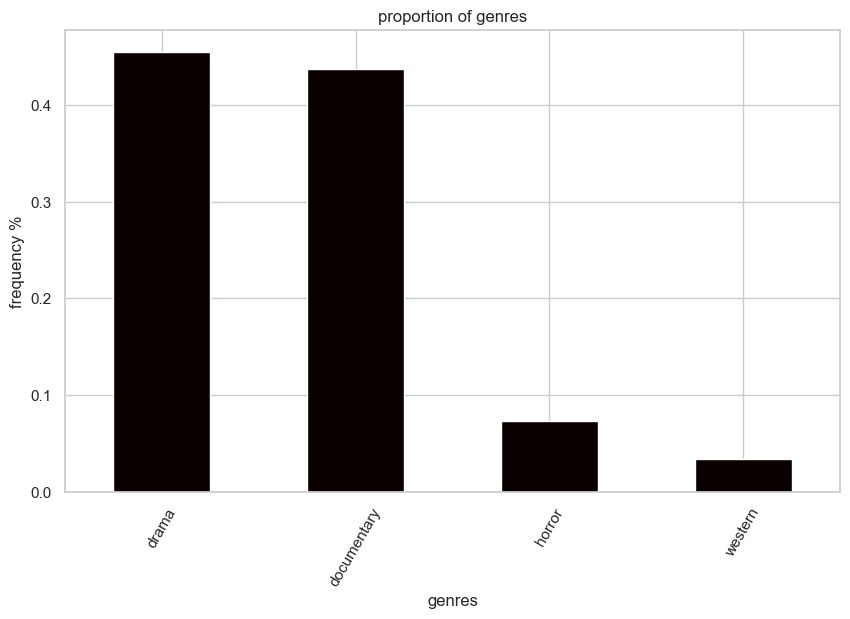

In [135]:
from imblearn.under_sampling import RandomUnderSampler
train_df.isna().sum()
test_df.isna().sum()
weights = train_df['genre'].value_counts(normalize=True)
fig, ax = plt.subplots(figsize=(10, 6))
weights.plot(kind='bar', stacked = True, colormap = 'hot')
ax.set_xticklabels(list(weights.index), rotation=60)
ax.set_title("proportion of genres")
ax.set_xlabel("genres")
ax.set_ylabel("frequency %");

* under sampling data for test

In [113]:
def rus(xtable, ytable , n):
    new_len = len(xtable) - n
    print(new_len)
    us = RandomUnderSampler(sampling_strategy={'drama': int(weights.iloc[0] * new_len), 'documentary': int(weights.iloc[1] * new_len), 'comedy':int(weights.iloc[2] * new_len), 'short':int(weights.iloc[3] * new_len)
                                                    , 'horror':int(weights.iloc[4] * new_len), 'thriller':int(weights.iloc[5] * new_len), 'action':int(weights.iloc[6] * new_len), 'western':int(weights.iloc[7] * new_len)
                                                    , 'reality-tv':int(weights.iloc[8] * new_len), 'family':int(weights.iloc[9] * new_len), 'adventure':int(weights.iloc[10] * new_len), 'music':int(weights.iloc[11] * new_len),
                                                    'romance':int(weights.iloc[12] * new_len), 'sci-fi':int(weights.iloc[13] * new_len),'crime':int(weights.iloc[14] * new_len), 'animation':int(weights.iloc[15] * new_len), 'sport':int(weights.iloc[16] * new_len),
                                                      'talk-show':int(weights.iloc[17] * new_len), 'fantasy':int(weights.iloc[18] * new_len),
                                                    'mystery':int(weights.iloc[19] * new_len), 'musical':int(weights.iloc[20] * new_len), 'biography':int(weights.iloc[21] * new_len), 'history':int(weights.iloc[22] * new_len)})
    return us.fit_resample(xtable, ytable)

# train_df, train_df['genre'] = rus(train_df, train_df['genre'], 20000)
# test_df, test_df['genre'] = rus(test_df, test_df['genre'], 6000)

train_df = train_df[(train_df['genre'] == 'drama') | (train_df['genre'] == 'documentary') |
                    (train_df['genre'] == 'western') |
                    (train_df['genre'] == 'horror')]
test_df = test_df[(test_df['genre'] == 'drama') | (test_df['genre'] == 'documentary') |
                   (test_df['genre'] == 'western') |
                    (test_df['genre'] == 'horror')]

train_df = train_df.drop(columns=['id', 'title'], axis=1)
test_df = test_df.drop(columns=['id', 'title'], axis=1)

In [114]:
train_df['genre'].value_counts()

genre
drama          11571
documentary    11132
horror          1873
western          877
Name: count, dtype: int64

* data cleaning  

In [115]:
contraction_mapping={
    "ain't": "is not",
    "aren't": "are not",
    "can't": "cannot",
    "cause": "because",
    "could've": "could have",
    "couldn't": "could not",
    "couldn't've": "could not have",
    "didn't": "did not",
    "doesn't": "does not",
    "don't": "do not",
    "hadn't": "had not",
    "hadn't've": "had not have",
    "hasn't": "has not",
    "haven't": "have not",
    "he'd": "he would",
    "he'd've": "he would have",
    "he'll": "he will",
    "he'll've": "he will have",
    "he's": "he is",
    "how'd": "how did",
    "how'd've": "how did have",
    "how'll": "how will",
    "how's": "how is",
    "I'd": "I would",
    "I'd've": "I would have",
    "I'll": "I will",
    "I'll've": "I will have",
    "I'm": "I am",
    "I've": "I have",
    "i'd": "i would",
    "i'd've": "i would have",
    "i'll": "i will",
    "i'll've": "i will have",
    "i'm": "i am",
    "i've": "i have",
    "isn't": "is not",
    "it'd": "it would",
    "it'd've": "it would have",
    "it'll": "it will",
    "it'll've": "it will have",
    "it's": "it is",
    "let's": "let us",
    "ma'am": "madam",
    "mayn't": "may not",
    "might've": "might have",
    "mightn't": "might not",
    "mightn't've": "might not have",
    "must've": "might have",
    "mustn't": "must not",
    "mustn't've": "must not have",
    "needn't": "need not",
    "needn't've": "need not have",
    "o'clock": "of the clock",
    "oughtn't": "ought not",
    "oughtn't've": "ought not have",
    "shan't": "shall not",
    "shall'n't": "shall not",
    "shan't've": "shall not have",
    "she'd": "she would",
    "she'd've": "she would have",
    "she'll": "she will",
    "she'll've": "she will have",
    "she's": "she is",
    "should've": "should have",
    "shouldn't": "should not",
    "shouldn't've": "should not have",
    "so've": "so have",
    "so's": "so as",
    "that'd": "that would",
    "that'd've": "that would have",
    "that's": "that is",
    "there'd": "there would",
    "there'd've": "there would have",
    "there's": "there is",
    "they'd": "they would",
    "they'd've": "they would have",
    "they'll": "they will",
    "they'll've": "they will have",
    "they're": "they are",
    "they've": "they have",
    "to've": "to have",
    "wasn't": "was not",
    "we'd": "we would",
    "we'd've": "we would have",
    "we'll": "we will",
    "we'll've": "we will have",
    "we're": "we are",
    "weren't": "were not",
    "what'll": "what will",
    "what'll've": "what will have",
    "what're": "what are",
    "what's": "what is",
    "what've": "what have",
    "when's": "when is",
    "when've": "when have",
    "where'd": "where did",
    "where's": "where is",
    "where've": "where have",
    "who'll": "who will",
    "who'll've": "who will have",
    "who's": "who is",
    "who've": "who have",
    "why's": "why is",
    "why've": "why have",
    "will've": "will have",
    "won't": "will not",
    "will't've": "will not have",
    "would've": "would have",
    "would't": "would not",
    "would't've": "would not have",
    "y'all": "you all",
    "y'all'd": "you all would",
    "y'all'd've": "you all would have",
    "y'all're": "you all are",
    "y'all've": "you have all",
    "you'd": "you would",
    "you'd've": "you would have",
    "you'll": "you will",
    "you'll've": "you will have",
    "you're": "you are",
    "you've": "you have",
}


def expand_contractions(sentence):
    contraction_pattern = re.compile('({})'.format('|'.join(contraction_mapping.keys())), flags=re.IGNORECASE | re.DOTALL)
    
    def expand_match(contraction):
        match = contraction.group(0)
        first_char = match[0]
        expanded_contraction = contraction_mapping.get(match.lower())
        expanded_contraction = first_char + expanded_contraction[1:]
        return expanded_contraction

    expanded_sentence = contraction_pattern.sub(expand_match, sentence)
    return expanded_sentence

In [116]:
def cleaning(text):
    # text = re.sub(r'[A-Z][a-z]*', ' ', text) # deghat paiin
    text = text.lower()
    text = re.sub('https?://\S+|www\.\S+', ' ', text) # removing URL links
    text = re.sub(r"\b\d+\b", " ", text) # removing number
    text = re.sub('<.*?>+', ' ', text) # removing special characters,
    text = re.sub('[%s]' % re.escape(string.punctuation), ' ', text) # punctuations
    text = re.sub('\w*\d\w*', ' ', text) # Remove words containing digits
    text = re.sub('\n', ' ', text)
    text = re.sub('[’“”…]', ' ', text)
    # text = re.sub(r'[^\w\s]', ' ', text) # Remove non-alphanumeric characters (except spaces)
    text = re.sub(r'[\s+]', ' ', text).strip() #'Replace multiple spaces with a single space and trim spaces'
    text = re.sub(r'\d+\S*', ' ', text)
    text = re.sub(r"(\b[A-Z][a-z]+('s)?\b)", ' ', text)

    emoji_pattern = re.compile("["
                           u"\U0001F600-\U0001F64F"  # emoticons
                           u"\U0001F300-\U0001F5FF"  # symbols & pictographs
                           u"\U0001F680-\U0001F6FF"  # transport & map symbols
                           u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                           u"\U00002702-\U000027B0"
                           u"\U000024C2-\U0001F251"
                           "]+", flags=re.UNICODE)
    text = emoji_pattern.sub(r'', text)

    text = expand_contractions(text)

    return text

In [117]:
train_df['description'] = train_df['description'].apply(cleaning)
test_df['description'] = test_df['description'].apply(cleaning)

* remove stopwords

In [118]:
stop_words = stopwords.words('english')
def remove_stop_words(row):
    row = word_tokenize(row)
    ret = [word for word in row if word.lower() not in stop_words]
    paragraph = " ".join(str(word) for word in ret)
    return paragraph
train_df['description'] = train_df['description'].apply(remove_stop_words)
test_df['description'] = test_df['description'].apply(remove_stop_words)

In [119]:
test_df['genre'].value_counts()

genre
drama          2042
documentary    1964
horror          331
western         155
Name: count, dtype: int64

* remove most frequent words

In [120]:
from collections import Counter
cnt = Counter()
for text in train_df['description'].values:
    for word in text.split():
        cnt[word] += 1
cnt.most_common(12)
temp = pd.DataFrame(cnt.most_common(12))
temp.columns = ['word', 'count']


FREQWORDS = set([w for (w, wc) in cnt.most_common(12)])

def remove_freqwords(text):
    return " ".join([
        word
        for word in str(text).split()
        if word not in FREQWORDS
    ])
train_df['description'] = train_df['description'].apply(lambda text: remove_freqwords(text))
test_df['description'] = test_df['description'].apply(lambda text: remove_freqwords(text))
train_df.head()

,description,genre
1,eighteen year old alex year old maggie four ye...,drama
2,four friends plan camping trip small campgroun...,horror
4,according legend god gave vincente ferrer patr...,documentary
5,day tafo uniquely poetic exploring spiritual h...,documentary
6,sensitive drama farm labourer abused daughter ...,drama


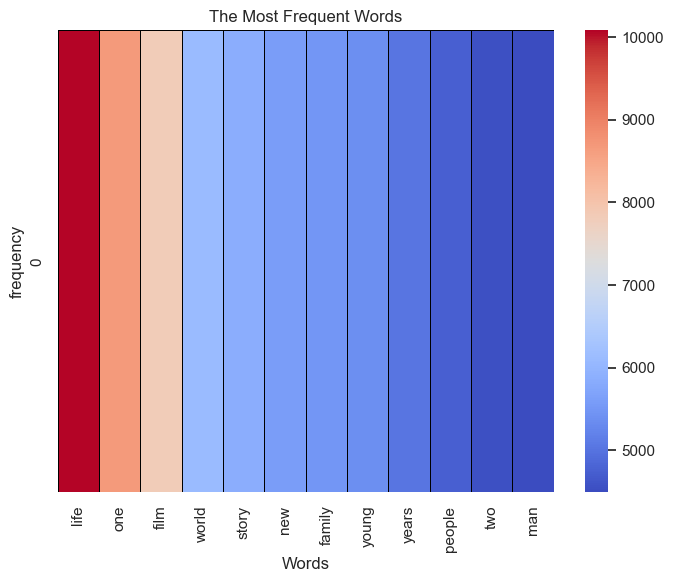

In [121]:
fig, ax = plt.subplots(figsize=(8, 6))
temp['count'].plot(kind='bar', stacked = True)
sns.heatmap(np.array(temp['count']).reshape(1, 12), cmap='coolwarm', linewidths=0.5, linecolor='black')
ax.set_xticklabels(list(temp['word']), rotation=90)
ax.set_title("The Most Frequent Words")
ax.set_xlabel("Words")
ax.set_ylabel("frequency");

* WordCloud

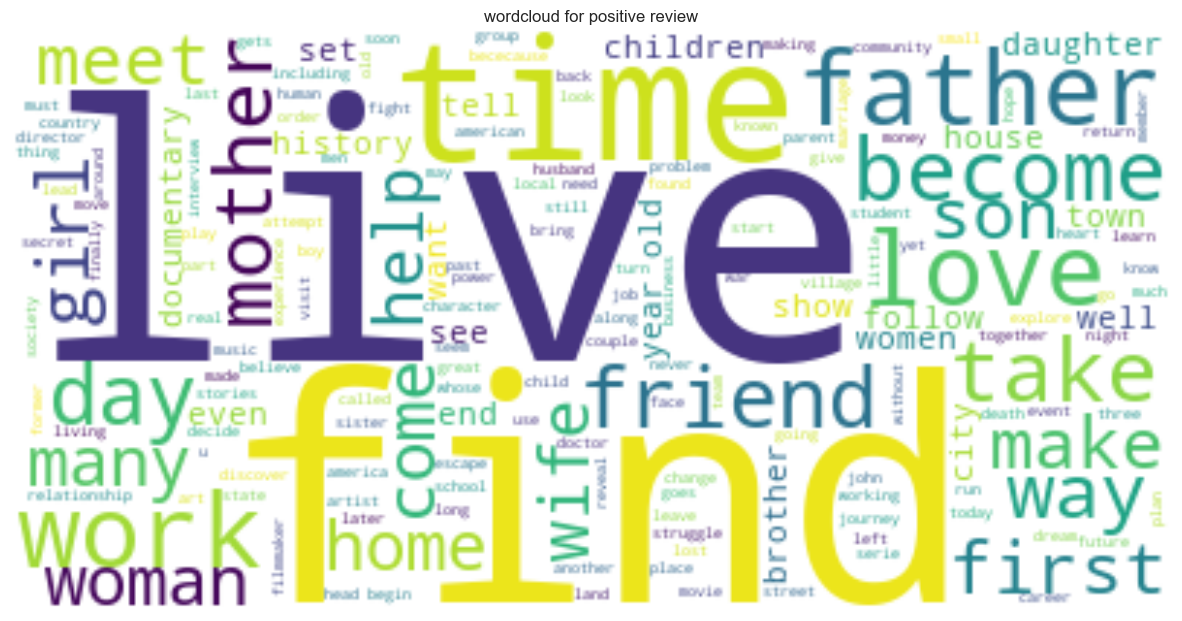

In [122]:
text = " ".join(i for i in train_df['description'])
wordcloud = WordCloud(background_color="white").generate(text)

plt.figure( figsize=(15,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title('wordcloud for positive review')
plt.show()

* lemmatizing

In [123]:
def get_wordnet_pos(treebank_tag):
    if treebank_tag.startswith('J'):
        return 'ADJ'
    elif treebank_tag.startswith('V'):
        return 'VERB'
    elif treebank_tag.startswith('N'):
        return 'NOUN'
    elif treebank_tag.startswith('R'):
        return 'ADV'
    else:
        return None


def tk_sm(text):
    ps = nltk.PorterStemmer()
    tokens = word_tokenize(text)
    pos_tags = pos_tag(tokens)
    non_useful_words = {"do", "does", "did", "doing", "he", "she", "we", "they", "it", "is", "am", "are", "was", "were", "likely"}

    stemmed_tokens = []
    for token, tag in pos_tags:
        wordnet_pos = get_wordnet_pos(tag) or None
        if wordnet_pos in {'VERB', 'NOUN'} and token.lower() not in non_useful_words:
            stemmed_tokens.append(ps.stem(token, wordnet_pos))
    sentence = " ".join(str(word) for word in stemmed_tokens)
    return sentence


def tk_lm(sentence):
    lemmatizer = WordNetLemmatizer()
    lemmatized_tokens = []
    for word, tag in pos_tag(word_tokenize(sentence)):
        wntag = tag[0].lower()
        wntag = wntag if wntag in ['a', 'r', 'n', 'v'] else None
        if wntag:
            lemma = lemmatizer.lemmatize(word, wntag)
            lemmatized_tokens.append(lemma)


    sentence = " ".join(str(word) for word in lemmatized_tokens)
    return sentence


In [124]:
train_df['description'] = train_df['description'].apply(tk_sm)
test_df['description'] = test_df['description'].apply(tk_sm)
train_df.iloc[0]

description    year year maggi year kay mother union nameless...
genre                                                      drama
Name: 1, dtype: object

In [129]:
train_df['description'] = train_df['description'].apply(tk_lm)
test_df['description'] = test_df['description'].apply(tk_lm)
train_df.iloc[0] 

In [125]:
train_df.head(10)

,description,genre
1,year year maggi year kay mother union nameless...,drama
2,friend plan camp trip campground spend even fi...,horror
4,accord god gave ferrer patron saint juchitan q...,documentary
5,day tafo explor connect ghana heritag filmmak ...,documentary
6,drama farm labour abus daughter fantasis offic...,drama
7,citi follow present hannah scott joynt visit r...,documentary
8,grace agre harcourt return support hous parti ...,drama
10,someth lurk surf sea beach swim air walk uprig...,horror
12,documentari show scope earl hamner talent know...,documentary
14,mario moreno rey creator charact mexico centur...,documentary


In [20]:
def clean(text):# low accuaracy
    text = re.sub(r"\s+[a-zA-Z]\s+", " ", text)
    text = re.sub(r"", "", text)
    text = re.sub(r"\)", "", text)
    text = re.sub('<.*?>+', '', text)
    text = re.sub(r"[-()\"#/@;:<>{}=~|.?,]", "", text)
    return text
train_df['description'] = train_df['description'].apply(clean)
test_df['description'] = test_df['description'].apply(clean)

# Genre prediction with KNN and Naive Bayes

* Encoding classes

In [140]:
le = LabelEncoder()
le.fit(train_df['genre'])
y_train = le.transform(train_df['genre'])
y_test= le.transform(test_df['genre'])

* TF IDF and Bag Of Words vectorization 

In [136]:
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer

x_train = train_df['description']

tfidf = TfidfVectorizer(analyzer = 'word', input = 'content')
bog = CountVectorizer(analyzer='word', max_features=11000)
x_train = bog.fit_transform(x_train)

x_test = test_df['description']
y_test = test_df['genre']
x_test = bog.transform(x_test)
x_test

<4492x11000 sparse matrix of type '<class 'numpy.int64'>'
	with 142284 stored elements in Compressed Sparse Row format>

* Document Term Matrix

In [132]:
def DTM_train(table):
    tokenized_table = table.apply(word_tokenize)

    vocabulary = sorted(set(word for row in tokenized_table for word in row))
    word_index = {word: idx for idx, word in enumerate(vocabulary)}

    x_train = np.zeros((len(table), len(vocabulary)), dtype=int)

    for i, tokens in enumerate(tokenized_table):
        indices = [word_index[token] for token in tokens if token in word_index]
        np.add.at(x_train[i], indices, 1)

    return vocabulary, x_train

def DTM_test(table, vocabulary):
    tokenized_table = table.apply(word_tokenize)
    word_index = {word: idx for idx, word in enumerate(vocabulary)}
    x_test = np.zeros((len(table), len(vocabulary)), dtype=int)

    for i, tokens in enumerate(tokenized_table):
        indices = [word_index[token] for token in tokens if token in word_index]
        np.add.at(x_test[i], indices, 1)

    return x_test

words, x_train = DTM_train(train_df['description'])
x_test = DTM_test(test_df['description'], words)

* PCA for KNN

In [95]:
from sklearn.decomposition import PCA
pca = PCA(n_components=800, copy=False)
fitted_pca = pca.fit(x_train)
transformed_x_train_pca = pca.transform(x_train)
transformed_x_test_pca = pca.transform(x_test)


* Split data to train and validation set for cross validation

In [137]:
from sklearn.model_selection import train_test_split
x_trn, x_val, y_trn, y_val = train_test_split(x_train, y_train, random_state=42, test_size=0.2)

In [127]:
from sklearn.metrics import confusion_matrix

def calculate_micro_f1_score(y_true, y_pred):
    y_true = pd.Series(y_true)
    y_pred = pd.Series(y_pred)
    
    true_positive = {}
    false_positive = {}
    false_negative = {}

    classes = np.unique(np.concatenate((y_true, y_pred)))
    
    for cls in classes:
        true_positive[cls] = 0
        false_positive[cls] = 0
        false_negative[cls] = 0

    for true, pred in zip(y_true, y_pred):
        if true == pred:
            true_positive[true] += 1
        else:
            false_positive[pred] += 1
            false_negative[true] += 1

    TP = np.sum(np.array(list(true_positive.values())))
    FP = np.sum(np.array(list(false_positive.values())))
    FN = np.sum(np.array(list(false_negative.values())))

    micro_precision = TP / (TP + FP)
    micro_recall = TP / (TP + FN)
    micro_f1_score = 2 * (micro_precision * micro_recall) / (micro_precision + micro_recall)

    return {
        "micro_precision": micro_precision,
        "micro_recall": micro_recall,
        "micro_f1_score": micro_f1_score
    }

def f1_score_per_class(y_true, y_pred):
    y_true = pd.Series(y_true)
    y_pred = pd.Series(y_pred)
    true_positive = {}
    false_positive = {}
    false_negative = {}
    
    classes = np.unique(np.concatenate((y_true, y_pred)))
    
    for cls in classes:
        true_positive[cls] = 0
        false_positive[cls] = 0
        false_negative[cls] = 0
    for true, pred in zip(y_true, y_pred):
        if true == pred:
            true_positive[true] += 1
        else:
            false_positive[pred] += 1
            false_negative[true] += 1
    precision = {}
    recall = {}
    f1_scores = []
    
    for cls in classes:
        if true_positive[cls] + false_positive[cls] == 0:
            precision[cls] = 0
        else:
            precision[cls] = true_positive[cls] / (true_positive[cls] + false_positive[cls])
        
        if true_positive[cls] + false_negative[cls] == 0:
            recall[cls] = 0
        else:
            recall[cls] = true_positive[cls] / (true_positive[cls] + false_negative[cls])
        
        if precision[cls] + recall[cls] == 0:
            f1 = 0
        else:
            f1 = 2 * (precision[cls] * recall[cls]) / (precision[cls] + recall[cls])
        
        f1_scores.append(f1)

    return classes, f1_scores

def Accuracy(y_true, y_pred):
    true_pred_count = 0
    for i in range(len(y_true)):
        if y_true[i] == y_pred[i]:
            true_pred_count += 1
    return true_pred_count / len(y_true)


* KNN model implementation

In [143]:
from sklearn.neighbors import KNeighborsClassifier


class KNN:
    def __init__(self, k, trained, label):
        self.k = k
        self.trained = trained
        self.label = label


    def euclidean_distance(x1, x2):
        return np.sqrt(np.sum((x1 - x2) ** 2, axis=1))

    @staticmethod
    def cosine_distance(x1, x2):
        dot_product = np.dot(x2, x1)
        magnitude = np.linalg.norm(x1) * np.linalg.norm(x2, axis=1)
        return 1 - (dot_product / magnitude)

    def predict(self, test_reduced):
        predictions = []
        for x in test_reduced:
            distances = self.cosine_distance(x, self.trained)
            k_indices = np.argpartition(distances, self.k)[:self.k]
            k_nearest_labels = [self.label[z] for z in k_indices]
            most_common = np.argmax(np.bincount(k_nearest_labels))
            predictions.append(most_common)
        return np.array(predictions)
model = KNeighborsClassifier(n_neighbors=24, metric = 'cosine')
model.fit(x_train, y_train)
KNN_prediction = model.predict(x_test)

In [144]:
KNN_eval = evaluation_result(y_test, KNN_prediction)
KNN_eval

,Accuracy,Precision,Recall,F1-Score
0,0.747551,0.747551,0.747551,0.747551


In [145]:
KNN_eval_per_class = evaluation_per_classes(classes, y_test, KNN_prediction)
KNN_eval_per_class

,F1-Score
3,0.861736
0,0.844857
1,0.817554
2,0.648855


In [146]:
def plot_pie(data, column, ax):
    counts = data['F1-Score']
    genres = list(data.index)
    percent = counts
    ax.pie(x=percent, labels=genres, autopct='%1.0f%%')

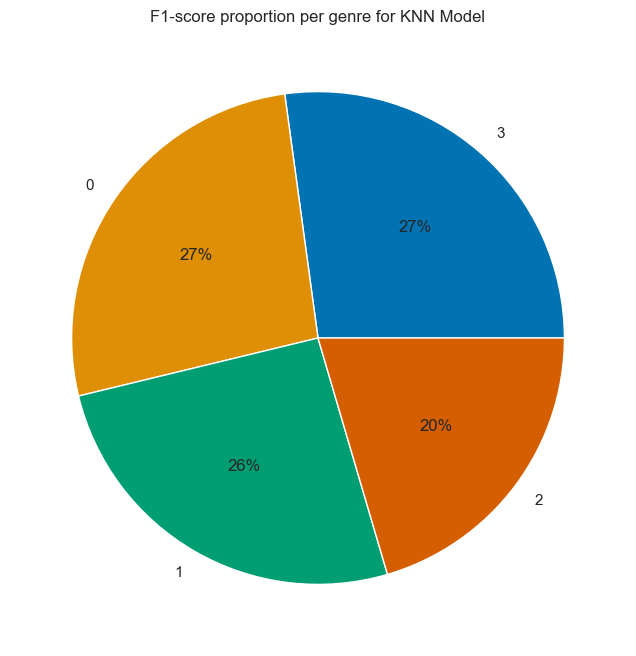

In [147]:
_, ax = plt.subplots(figsize=(10, 8))
plot_pie(KNN_eval_per_class, column='F1-Score', ax=ax)
ax.set_title('F1-score proportion per genre for KNN Model');

* Cross Validation For KNN

In [149]:
from sklearn.neighbors import KNeighborsClassifier
KNN_pred_eval = []
for i in range(2, 25):
    model = KNeighborsClassifier(n_neighbors=i, metric='cosine')
    model.fit(x_trn, y_trn)
    KNN_prediction = model.predict(x_test)
    KNN_pred_eval.append([i, calculate_micro_f1_score(y_test, KNN_prediction)['micro_precision']])

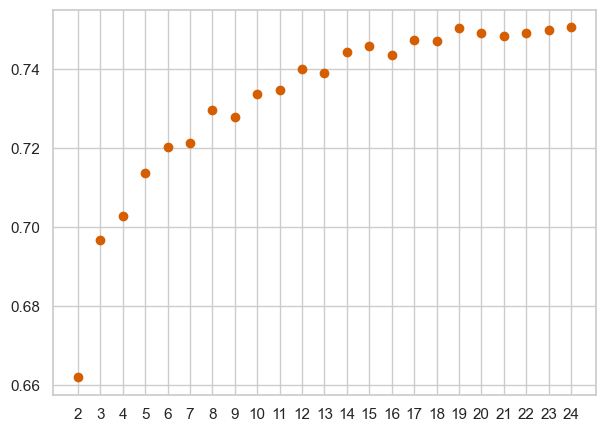

In [150]:
fig, ax = plt.subplots(figsize=(7, 5))
x = []
y = []
for i in range(len(KNN_pred_eval)):
    x.append(KNN_pred_eval[i][0])
    y.append(KNN_pred_eval[i][1])
ax.scatter(x,y, color = 'r')
ax.set_xticks(range(2, 25));

* Naive Bayes implementation

In [133]:
class NaiveBayes:
    def __init__(self, classes, word_count, smoothing=0.005):
        self.classes = classes
        self.word_count = word_count
        self.smoothing = smoothing

    def train(self, X, y):
        self.class_word_counts = {c: np.zeros(self.word_count) for c in self.classes}
        self.class_counts = {c: 0 for c in self.classes}
        self.total_word_counts = np.zeros(self.word_count)
        self.total_counts = 0

        for i in range(len(y)):
            cls = y[i]
            self.class_counts[cls] += 1
            self.total_counts += 1
            self.class_word_counts[cls] += X[i]
            self.total_word_counts += X[i]

        self.class_probs = {
            c: (self.class_counts[c] + self.smoothing) / (self.total_counts + self.smoothing * len(self.classes))
            for c in self.classes
        }
        self.word_probs = {
            c: (self.class_word_counts[c] + self.smoothing) / (self.class_counts[c] + self.smoothing * self.word_count)
            for c in self.classes
        }

    def predict(self, X):
        predictions = []
        for x in X:
            class_scores = {}
            for c in self.classes:
                class_scores[c] = np.log(self.class_probs[c])
                class_scores[c] += np.sum(np.log(self.word_probs[c]) * x)
            predictions.append(max(class_scores, key=class_scores.get))
        return predictions



word_count = x_train.shape[1]
classes = np.unique(y_train)
nb = NaiveBayes(classes, word_count, smoothing=0.005)
nb.train(x_train, y_train)

NB_prediction = nb.predict(x_test)

In [134]:
def evaluation_result(y_test, y_pred):
    eval_dict_nb = calculate_micro_f1_score(y_test, y_pred)
    eval_df_nb = pd.DataFrame(index=range(1))
    eval_df_nb['Accuracy'] = Accuracy(y_test, y_pred)
    eval_df_nb['Precision'] = eval_dict_nb['micro_precision']
    eval_df_nb['Recall'] = eval_dict_nb['micro_recall']
    eval_df_nb['F1-Score'] = eval_dict_nb['micro_f1_score']
    return eval_df_nb
NB_eval = evaluation_result(y_test, NB_prediction)
NB_eval

,Accuracy,Precision,Recall,F1-Score
0,0.821683,0.821683,0.821683,0.821683


In [52]:
def evaluation_per_classes(classes, y_test, y_pred):
    f_score_array = f1_score_per_class(y_test, NB_prediction)[1]
    df = pd.DataFrame(index=classes)
    df['F1-Score'] = f_score_array
    return df.sort_values(by='F1-Score', ascending=False)
    
classes = le.classes_
NB_eval_per_class = evaluation_per_classes(classes, y_test, NB_prediction)
NB_eval_per_class

,F1-Score
drama,0.736695
horror,0.659259
comedy,0.560411
short,0.362000


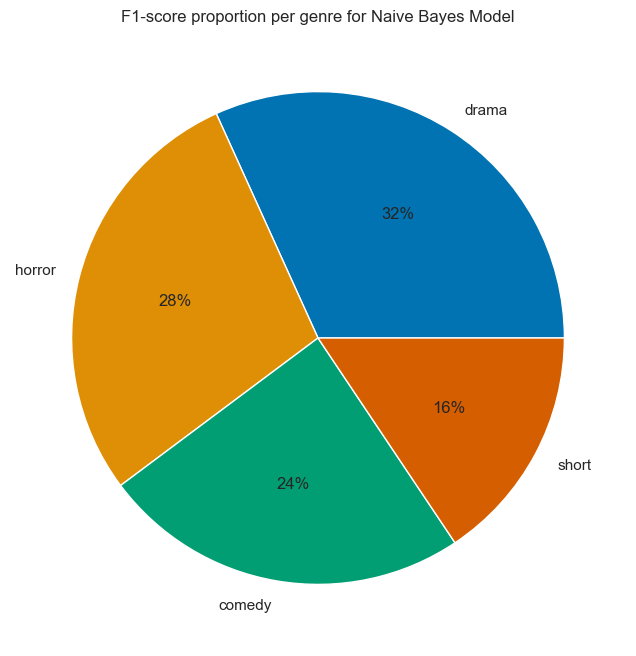

In [55]:
_, ax = plt.subplots(figsize=(10, 8))
plot_pie(NB_eval_per_class, column='F1-Score', ax=ax)
ax.set_title('F1-score proportion per genre for Naive Bayes Model');

# Neural Network implementation

* Neural Network Structure

In [100]:
tf.random.set_seed(1234)  # applied to achieve consistent results
NN_model = Sequential(
    [
        Dense(512, activation = 'relu',   name = "L1"),
        Dense(256, activation = 'relu',   name = "L2"),
        Dense(128, activation = 'relu', name = "L3"),
        Dense(64, activation = 'relu', name = "L4"),
        Dense(23, activation = 'linear', name = "L5")
    ]
)

In [101]:
NN_model.compile(
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    optimizer=tf.keras.optimizers.Adam(0.001),
)

NN_model.fit(
    x_train,y_train,
    epochs=19
)

Epoch 1/19
796/796 ━━━━━━━━━━━━━━━━━━━━ 30s 37ms/step - loss: 0.7206
Epoch 2/19
796/796 ━━━━━━━━━━━━━━━━━━━━ 34s 43ms/step - loss: 0.1793
Epoch 3/19
796/796 ━━━━━━━━━━━━━━━━━━━━ 35s 44ms/step - loss: 0.0602
Epoch 4/19
796/796 ━━━━━━━━━━━━━━━━━━━━ 35s 44ms/step - loss: 0.0277
Epoch 5/19
796/796 ━━━━━━━━━━━━━━━━━━━━ 35s 44ms/step - loss: 0.0151
Epoch 6/19
796/796 ━━━━━━━━━━━━━━━━━━━━ 35s 44ms/step - loss: 0.0136
Epoch 7/19
796/796 ━━━━━━━━━━━━━━━━━━━━ 36s 45ms/step - loss: 0.0090
Epoch 8/19
796/796 ━━━━━━━━━━━━━━━━━━━━ 39s 49ms/step - loss: 0.0165
Epoch 9/19
796/796 ━━━━━━━━━━━━━━━━━━━━ 35s 44ms/step - loss: 0.0037
Epoch 10/19
796/796 ━━━━━━━━━━━━━━━━━━━━ 35s 44ms/step - loss: 0.0014
Epoch 11/19
796/796 ━━━━━━━━━━━━━━━━━━━━ 35s 44ms/step - loss: 0.0170
Epoch 12/19
796/796 ━━━━━━━━━━━━━━━━━━━━ 37s 39ms/step - loss: 0.0065
Epoch 13/19
796/796 ━━━━━━━━━━━━━━━━━━━━ 36s 45ms/step - loss: 0.0028
Epoch 14/19
796/796 ━━━━━━━━━━━━━━━━━━━━ 36s 46ms/step - loss: 0.0027
Epoch 15/19
796/796 ━━━━━━━━━

In [105]:
y_pred = NN_model.predict(x_test)
pred = []
for i in range(len(y_pred)):
    pred.append(np.argmax(y_pred[i]))
prediction = np.array(pred)

141/141 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step


In [108]:
NN_eval = evaluation_result(y_test, prediction)
NN_eval

,Accuracy,Precision,Recall,F1-Score
0,0.860196,0.860196,0.860196,0.860196


In [109]:
NN_eval_per_class = evaluation_per_classes(classes, y_test, prediction)
NN_eval_per_class

,F1-Score
3,0.882759
0,0.867038
1,0.840158
2,0.657534


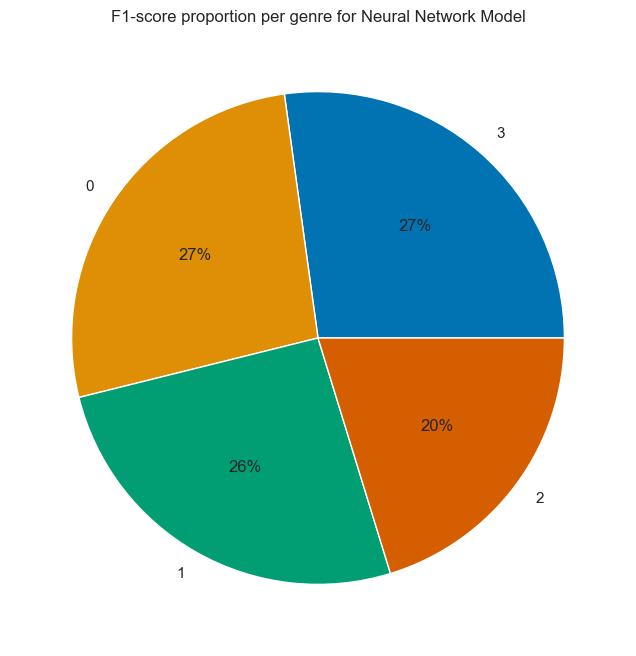

In [110]:
_, ax = plt.subplots(figsize=(10, 8))
plot_pie(NN_eval_per_class, column='F1-Score', ax=ax)
ax.set_title('F1-score proportion per genre for Neural Network Model');

* Comparison of Models

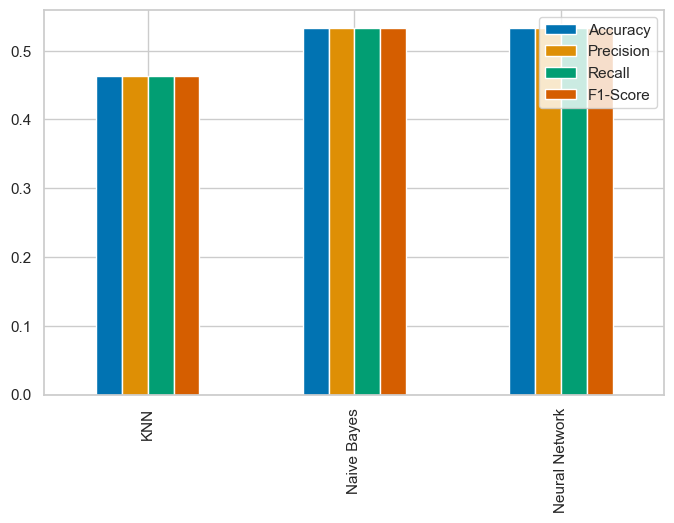

In [212]:
fig, ax = plt.subplots(figsize = (8, 5))
df = pd.concat([KNN_eval, NB_eval, NN_eval])
df.index = ['KNN', 'Naive Bayes', 'Neural Network']
df.plot(kind='bar', ax = ax);

In [220]:
test_for_rep = pd.read_csv('test.csv')
test_for_rep = test_for_rep.drop(columns=['Unnamed: 0', 'title'], axis=1)
test_for_rep

,description
0,"Every year in Britain, hundreds of gay men hav..."
1,"In 1960, Stan, the protagonist, after having m..."
2,The TV special goes behind those lines and int...
3,For the first time ever the whole story of the...
4,An aim to put an end to suicide bombing with t...
...,...
95,The Circle - Which is the center of St. Louis'...
96,When the dedicated social worker Anna Liu find...
97,"Before his compulsory retirement, on his last ..."
98,"Marie Leroux, who is married to Charles, an ho..."


In [223]:
test_for_rep['description'] = test_for_rep['description'].apply(cleaning)
test_for_rep['description'] = test_for_rep['description'].apply(remove_stop_words)
test_for_rep['description'] = test_for_rep['description'].apply(lambda text: remove_freqwords(text))
test_for_rep

,description
0,every year britain hundreds gay men homes sear...
1,stan protagonist made fortune asia returns cor...
2,tv special goes behind lines traditions sauna ...
3,first ever whole murder meredith kercher subse...
4,aim put end suicide bombing thought children w...
...,...
95,circle center st louis drug trafficking scene ...
96,dedicated social worker anna liu finds boy mic...
97,compulsory retirement last day work marshall j...
98,marie leroux married charles honest understand...


In [228]:
test_set_nb = DTM_test(test_for_rep['description'], words)
test_set_nb

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [229]:
test_set_KNN_NN = bog.transform(test_for_rep['description'])

In [255]:
NB_pred = nb.predict(test_set_nb)
KNN_pred = model.predict(test_set_KNN_NN)
NN_y_pred = NN_model.predict(test_set_KNN_NN)
pred = []
for i in range(len(NN_y_pred)):
    pred.append(np.argmax(NN_y_pred[i]))
NN_pred = np.array(pred)

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


In [246]:
cls_mapping = {}
i = 0
for cls in le.classes_:
    cls_mapping[i] = cls
    i+=1
def mapping_class(arr):
    class_pred = []
    for p in arr:
        class_pred.append(cls_mapping[p])
    return class_pred

,0
0,documentary
1,drama
2,documentary
3,documentary
4,documentary
...,...
95,documentary
96,drama
97,drama
98,drama


In [256]:
pd.DataFrame(mapping_class(NB_pred)).to_csv('NB_prediction')
pd.DataFrame(mapping_class(KNN_pred)).to_csv('KNN_prediction')
pd.DataFrame(mapping_class(NN_pred)).to_csv('NN_prediction')